# Single negative muon simulation track quality

In [1]:
import uproot
import awkward as ak
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches

import vector
vector.register_awkward() #Allows Awkward array records to be interpreted as vectors

#load ROOT file
events = uproot.open('input/SimpleTree_ideal_fst_uniform_mudst.root:data') #Ideal tracking, fst seeding, uniform generation

### Generated particle information

In [2]:
mc_arrays = events.arrays(filter_name="mcpart_*")
print("")
print(mc_arrays.type)
print("")

#Select only generated muon, exclude secondaries
cut_primary = mc_arrays["mcpart_geid"]==6 #Geant3 id code

px = mc_arrays["mcpart_px"][cut_primary]
py = mc_arrays["mcpart_py"][cut_primary]
pz = mc_arrays["mcpart_pz"][cut_primary]

particles = vector.zip({
    "px": px,
    "py": py,
    "pz": pz,
})

#For testing
print(particles)
print(particles.pt)

pt = np.sqrt(px**2+py**2)
print(pt)
print(ak.count(pt,axis=-1))
print(ak.count(pt))


10000 * {"mcpart_num": int32, "mcpart_index": var * int32, "mcpart_geid": var * int32, "mcpart_idVtx": var * int32, "mcpart_px": var * float32, "mcpart_py": var * float32, "mcpart_pz": var * float32, "mcpart_E": var * float32, "mcpart_charge": var * int32, "mcpart_Vtx_x": var * float32, "mcpart_Vtx_y": var * float32, "mcpart_Vtx_z": var * float32}

[[{x: -0.137, y: -0.724, z: 42.3}], ... [{x: -0.113, y: 0.132, z: 8.07}]]
[[0.737], [1.55], [4.08], [0.205], [0.3], ... 1.65], [1.1], [11.2], [0.637], [0.174]]
[[0.737], [1.55], [4.08], [0.205], [0.3], ... 1.65], [1.1], [11.2], [0.637], [0.174]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10000


### Reconstructed tracks

In [3]:
trk_arrays = events.arrays(filter_name="Trk_*")
print("")
print(trk_arrays.type)
print("")

num_trk = trk_arrays["Trk_ntrks"]
rec_px = trk_arrays["Trk_px"]
rec_py = trk_arrays["Trk_py"]
rec_pz = trk_arrays["Trk_pz"]
rec_charge = trk_arrays["Trk_charge"]

rec_particles = vector.zip({
    "px": rec_px,
    "py": rec_py,
    "pz": rec_pz,
})

#For testing
print(num_trk)

print(rec_particles.pt)

rec_pt = np.sqrt(rec_px**2+rec_py**2)
print(rec_pt)
print(ak.count(rec_pt,axis=-1))
print(ak.count(rec_pt))


10000 * {"Trk_ntrks": int32, "Trk_px": var * float32, "Trk_py": var * float32, "Trk_pz": var * float32, "Trk_charge": var * int32, "Trk_chi2": var * float32, "Trk_ndf": var * float32, "Trk_proj_ecal_x": var * float32, "Trk_proj_ecal_y": var * float32, "Trk_proj_ecal_z": var * float32, "Trk_proj_hcal_x": var * float32, "Trk_proj_hcal_y": var * float32, "Trk_proj_hcal_z": var * float32}

[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, ... 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
[[], [1.68], [4.09], [0.239], [], [4.05], ... [7.97], [], [1.03], [10.3], [], []]
[[], [1.68], [4.09], [0.239], [], [4.05], ... [7.97], [], [1.03], [10.3], [], []]
[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, ... 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
6085


### Make plots

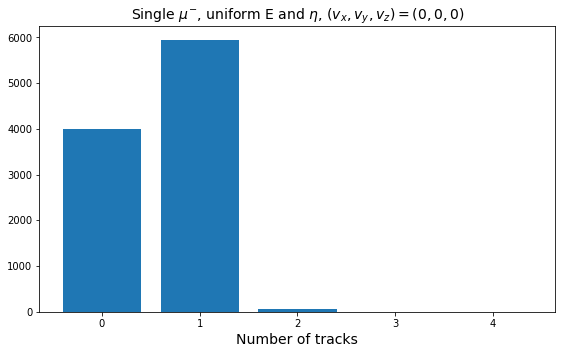

[{x: 5944, y: 5944, z: 5944}]
[{x: 5944, y: 5944, z: 5944}]


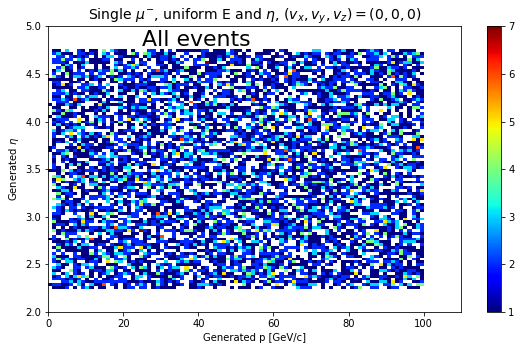

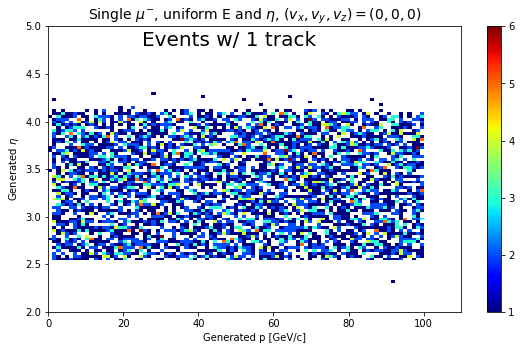

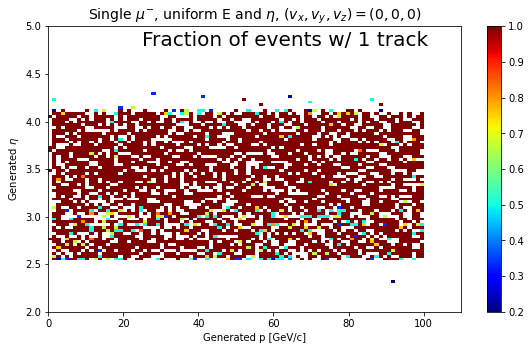

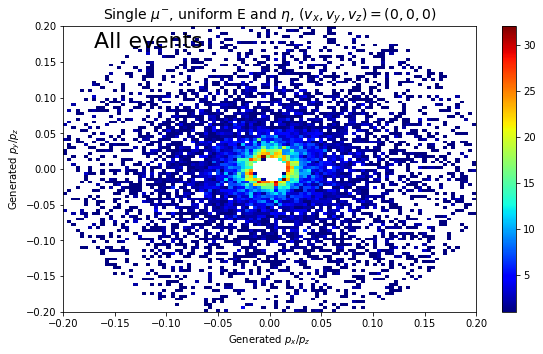

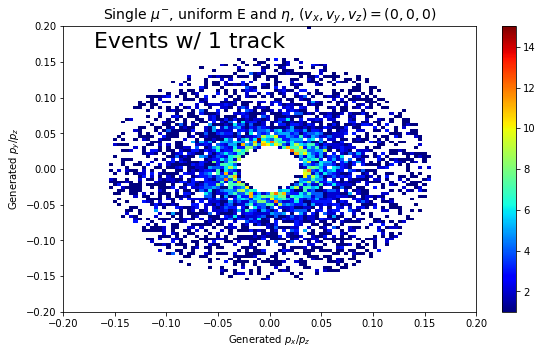

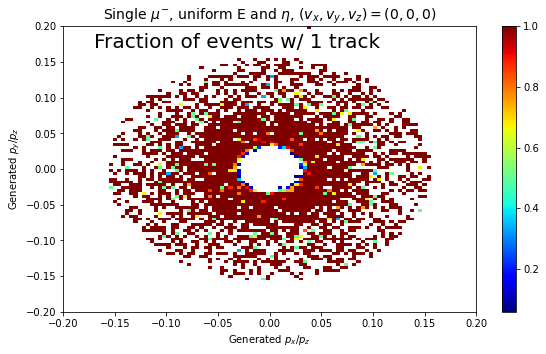

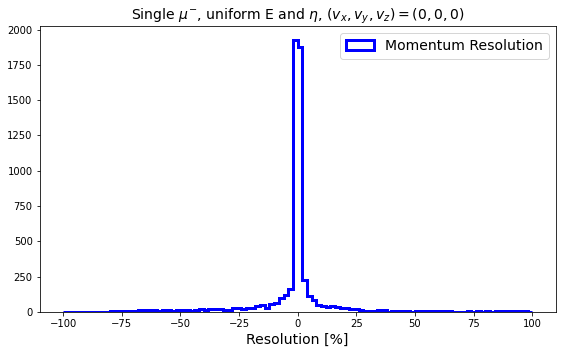

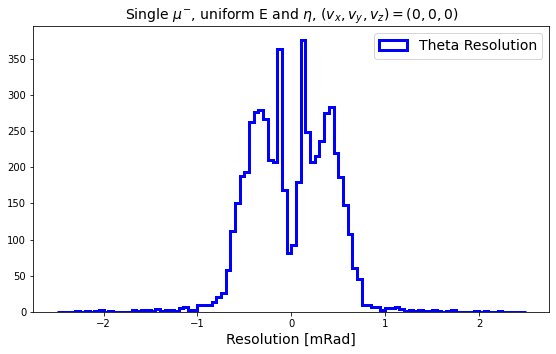

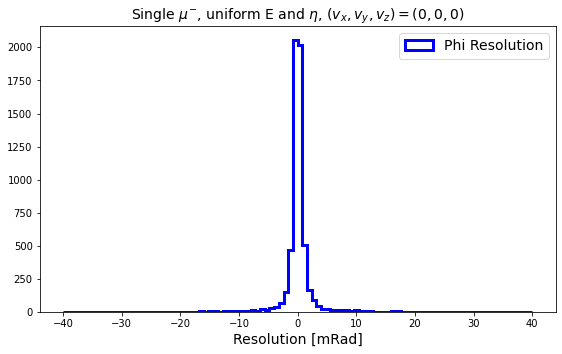

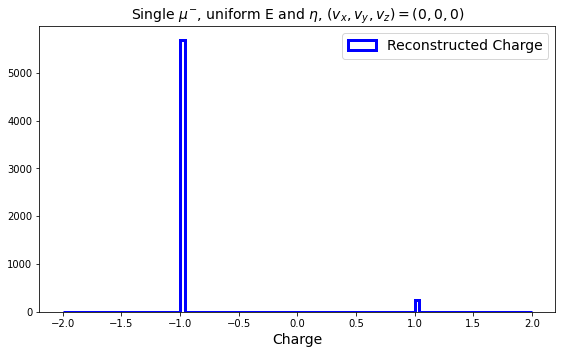

In [4]:
# Open pdf file
pp1 = PdfPages('Single_muon_uniform_ideal_fst.pdf') #Ideal tracking, fst seeding, uniform generation

## Plot 1 -- number of reconstructed tracks
labels, counts = np.unique(num_trk, return_counts=True)
plt.bar(labels, counts, align='center',label="Number of reconstructed tracks")
plt.gca().set_xticks(labels)
plt.xlabel("Number of tracks",fontsize=14)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
#plt.legend(fontsize=14)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## For track reconstruction plots, remove events with no or multiple reconstructed tracks
particles_wtrk = particles[num_trk==1]
particles_notrk = particles[num_trk==0]
rec_particles_wtrk = rec_particles[num_trk==1]
rec_charge_wtrk = rec_charge[num_trk==1]

#For testing
print(ak.count(particles_wtrk,axis=0))
print(ak.count(rec_particles_wtrk,axis=0))

## Plot 2a -- generated particle eta vs. p
counts_2a, xedges, yedges, im = plt.hist2d(np.array(ak.flatten(particles.p)),np.array(ak.flatten(particles.eta)),
                                           bins=(100,100),range=([0,110],[2,5]),
                                           cmap=plt.cm.jet,cmin = 1)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.xlabel("Generated p [GeV/c]")
plt.ylabel("Generated $\eta$")

plt.text(25,4.8,"All events",fontsize=22)
plt.colorbar(im)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 2b -- generated particle px vs py, with 1 reconstructed track
counts_2b, xedges, yedges, im = plt.hist2d(np.array(ak.flatten(particles_wtrk.p)),np.array(ak.flatten(particles_wtrk.eta)),
                                           bins=(100,100),range=([0,110],[2,5]),
                                           cmap=plt.cm.jet,cmin = 1)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.xlabel("Generated p [GeV/c]")
plt.ylabel("Generated $\eta$")

plt.text(25,4.8,"Events w/ 1 track",fontsize=20)
plt.colorbar(im)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 2c -- fraction of events with 1 reconstructed track
eff_1trk = counts_2b/counts_2a
pcm = plt.pcolormesh(xedges, yedges, eff_1trk.T,cmap=plt.cm.jet)

plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.xlabel("Generated p [GeV/c]")
plt.ylabel("Generated $\eta$")

plt.text(25,4.8,"Fraction of events w/ 1 track",fontsize=20)
plt.colorbar(pcm)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 3a -- generated particle py/pz vs. px/pz
counts_3a, xedges, yedges, im = plt.hist2d(np.array(ak.flatten(particles.px/particles.pz)),
                                           np.array(ak.flatten(particles.py/particles.pz)),
                                           bins=(100,100),range=([-0.2,0.2],[-0.2,0.2]),
                                           cmap=plt.cm.jet,cmin = 1)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.xlabel("Generated $p_{x}/p_{z}$")
plt.ylabel("Generated $p_{y}/p_{z}$")

plt.text(-0.17,0.17,"All events",fontsize=22)
plt.colorbar(im)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 3b -- generated particle py/pz vs. px/pz, with 1 reconstructed track
counts_3b, xedges, yedges, im = plt.hist2d(np.array(ak.flatten(particles_wtrk.px/particles_wtrk.pz)),
                                           np.array(ak.flatten(particles_wtrk.py/particles_wtrk.pz)),
                                           bins=(100,100),range=([-0.2,0.2],[-0.2,0.2]),
                                           cmap=plt.cm.jet,cmin = 1)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.xlabel("Generated $p_{x}/p_{z}$")
plt.ylabel("Generated $p_{y}/p_{z}$")

plt.text(-0.17,0.17,"Events w/ 1 track",fontsize=22)
plt.colorbar(im)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 3c -- fraction of events with 1 reconstructed track
eff_1trk = counts_3b/counts_3a
pcm = plt.pcolormesh(xedges, yedges, eff_1trk.T,cmap=plt.cm.jet)

plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.xlabel("Generated $p_{x}/p_{z}$")
plt.ylabel("Generated $p_{y}/p_{z}$")

plt.text(-0.17,0.17,"Fraction of events w/ 1 track",fontsize=20)
plt.colorbar(pcm)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 4 -- momentum resolution in %
mom_res = 100.*( (rec_particles_wtrk.p-particles_wtrk.p) / particles_wtrk.p)

plt.hist(mom_res,label="Momentum Resolution",histtype='step',ec='blue',
         lw=3,bins=100,range=[-100,100])
plt.xlabel("Resolution [%]",fontsize=14)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.legend(fontsize=14)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 5 -- Theta resolution in mRad
theta_res = 1000.* (rec_particles_wtrk.theta-particles_wtrk.theta)

plt.hist(theta_res,label="Theta Resolution",histtype='step',ec='blue',
         lw=3,bins=100,range=[-2.5,2.5])
plt.xlabel("Resolution [mRad]",fontsize=14)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.legend(fontsize=14)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 6 -- Phi resolution in mRad
phi_res = 1000.* (rec_particles_wtrk.phi-particles_wtrk.phi)

plt.hist(phi_res,label="Phi Resolution",histtype='step',ec='blue',
         lw=3,bins=100,range=[-40,40])
plt.xlabel("Resolution [mRad]",fontsize=14)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.legend(fontsize=14)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

## Plot 7 -- Reconstructed charge
plt.hist(rec_charge_wtrk,label="Reconstructed Charge",histtype='step',ec='blue',
         lw=3,bins=100,range=[-2,2])
plt.xlabel("Charge",fontsize=14)
plt.title('Single $\mu^{-}$, uniform E and $\eta$, $(v_{x},v_{y},v_{z}) = (0,0,0)$',fontsize=14)
plt.legend(fontsize=14)

#Figure Output
fig = plt.gcf()
fig.set_size_inches(18.5/2, 10.5/2)
plt.show()
fig.savefig(pp1, format='pdf')

#Close file
pp1.close()